  DEVELOPEMENT OF LANGUAGE DETECTION SYSTEM USING MACHINE LEARNING


In [48]:
#IMPORT LIBRARIES


import string
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score




In [2]:
# Loading multiple datasets for usage more languages



df1 =pd.read_csv("C:\\Users\\abhis\\Desktop\\PROJ_DOCS\\dataset.csv")
df2 = pd.read_csv("C:\\Users\\abhis\\Desktop\\PROJ_DOCS\\Language Detection.csv")
df3=pd.read_csv("C:\\Users\\abhis\\Desktop\\PROJ_DOCS\\telugu_sentences_200.csv")

In [4]:
# Concatenate  datasets
# Save the combined dataset

df= pd.concat([df1, df2, df3], ignore_index=True)
df.to_csv('df', index=False)


In [5]:
# Display newly created DataFrame

df

,Text,Language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch
...,...,...
32528,ఈ సముద్రయానం చాలా ఆకర్షణీయంగా ఉంది.,Telugu
32529,ఆ ఫలితం చాలా ఆశ్చర్యకరంగా ఉంది.,Telugu
32530,ఈ విరామం నాకు చాలా అవసరం.,Telugu
32531,ఆ కుటుంబం చాలా స్నేహపూర్వకంగా ఉంది.,Telugu


 Exploratory Data Analysis (EDA)

In [6]:
# Display the first few rows of the dataframe
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
                                                Text  Language
0  klement gottwaldi surnukeha palsameeriti ning ...  Estonian
1  sebes joseph pereira thomas  på eng the jesuit...   Swedish
2  ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...      Thai
3  விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...     Tamil
4  de spons behoort tot het geslacht haliclona en...     Dutch


In [7]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Text        0
Language    0
dtype: int64


In [8]:
# Display rows and columns in DATAFRAME
df.shape

(32533, 2)

In [9]:
# Check the distribution of languages
print("\nLanguage distribution:")
print(df['Language'].value_counts())



Language distribution:
Language
English       2385
French        2014
Spanish       1819
Russian       1692
Dutch         1546
Arabic        1536
Turkish       1474
Tamil         1469
Hindi         1063
Latin         1000
Urdu          1000
Japanese      1000
Estonian      1000
Thai          1000
Swedish       1000
Korean        1000
Chinese       1000
Indonesian    1000
Portugese     1000
Romanian      1000
Persian       1000
Pushto        1000
Portugeese     739
Italian        698
Sweedish       676
Malayalam      594
German         470
Danish         428
Kannada        369
Greek          365
Telugu         196
Name: count, dtype: int64


In [11]:
# Get basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32533 entries, 0 to 32532
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      32533 non-null  object
 1   Language  32533 non-null  object
dtypes: object(2)
memory usage: 508.5+ KB
None


In [12]:
# Describe the numerical features
print(df.describe())

                                                     Text Language
count                                               32533    32533
unique                                              32215       31
top     haec commentatio automatice praeparata res ast...  English
freq                                                   48     2385


 DATA VISUALIZATION

C:\Users\abhis\AppData\Local\Temp\ipykernel_15236\3644990070.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Language', data=df, palette='viridis')


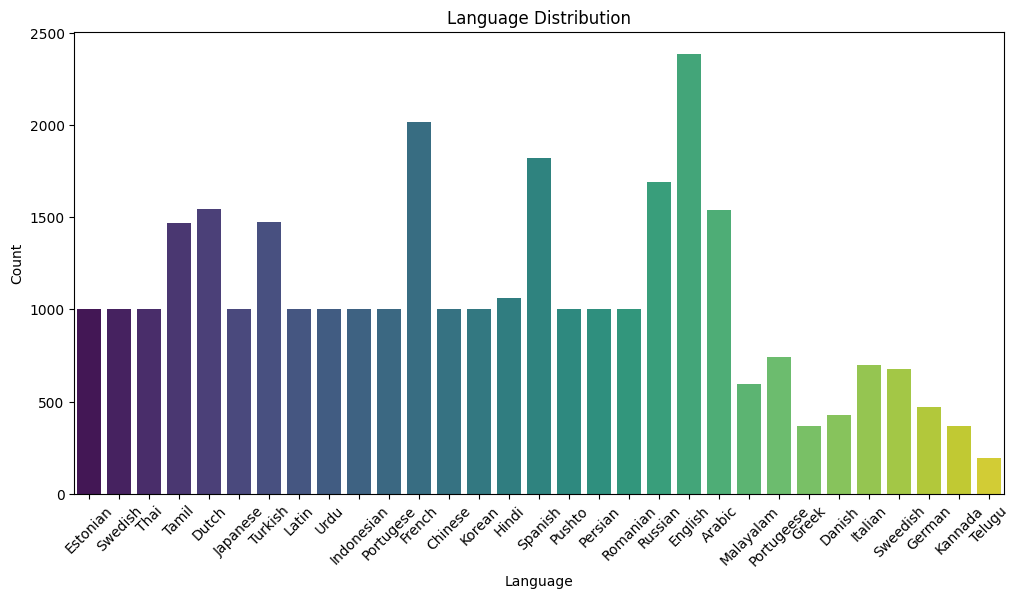

In [15]:
# Bar plot for language distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='Language', data=df, palette='viridis')
plt.title('Language Distribution')
plt.xlabel('Language')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [16]:
# Text length analysis
df['Text_Length'] = df['Text'].apply(len)
print("\nStatistics of text length:")
print(df['Text_Length'].describe())


Statistics of text length:
count    32533.000000
mean       280.249101
std        266.428974
min          1.000000
25%        140.000000
50%        209.000000
75%        354.000000
max      19088.000000
Name: Text_Length, dtype: float64


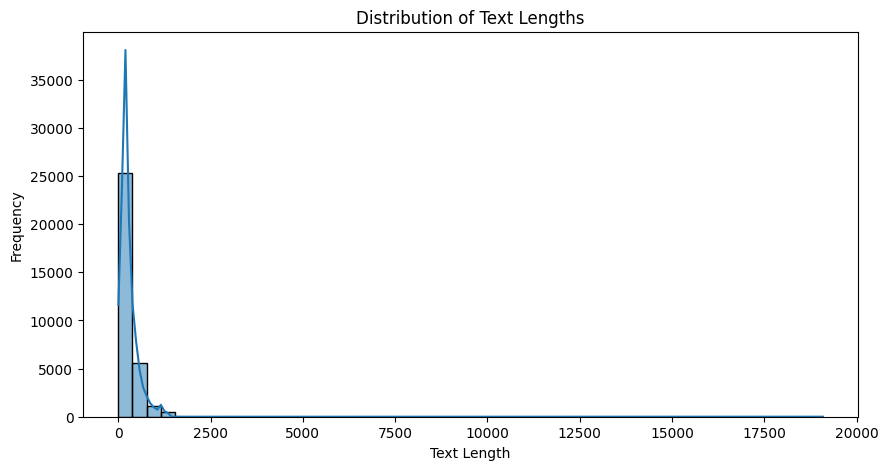

In [17]:
# Plot the distribution of text lengths
plt.figure(figsize=(10, 5))
sns.histplot(df['Text_Length'], bins=50, kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()


In [20]:

# Correlation analysis
correlation_matrix = df[['Text_Length', 'Word_Count']].corr()
print("\nCorrelation matrix:")
print(correlation_matrix)


Correlation matrix:
             Text_Length  Word_Count
Text_Length     1.000000    0.935626
Word_Count      0.935626    1.000000


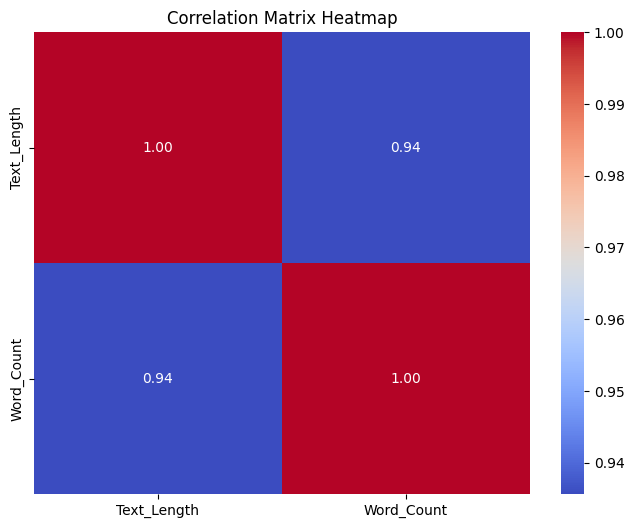

In [21]:
# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


 DATA PREPROCESSING

In [22]:
# Method to remove punctuations and lowercase the text
def remove_pun(text):
    if isinstance(text, str):
        for pun in string.punctuation:
            text = text.replace(pun, "")
        text = text.lower()
    return text

In [23]:
# Apply the remove_pun function to the 'Text' column
df['Text'] = df['Text'].apply(remove_pun)

In [24]:
# Prepare data for model training
X = df['Text'].values  # Feature
y = df['Language'].values  # Target

In [25]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Initialize the vectorizer
vec = TfidfVectorizer(ngram_range=(1, 2), analyzer='char')

In [27]:
# Define individual models
random_forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
svm = SVC(kernel='linear', probability=True, random_state=42)
naive_bayes = MultinomialNB()

In [28]:
# Create a voting classifier with these models
voting_clf = VotingClassifier(
    estimators=[
        ('rf', random_forest),
        ('svm', svm),
        ('nb', naive_bayes)
    ],
    voting='soft'  # Use 'soft' voting to consider predicted probabilities
)

In [29]:
# Create the pipeline
model_pipe = Pipeline([
    ('vec', vec),  # Vectorize the input data using TF-IDF
    ('voting_clf', voting_clf)  # Combine models using VotingClassifier
])

In [30]:

# Fit the pipeline on the training data
model_pipe.fit(X_train, y_train)


Pipeline(steps=[('vec', TfidfVectorizer(analyzer='char', ngram_range=(1, 2))),
                ('voting_clf',
                 VotingClassifier(estimators=[('rf',
                                               RandomForestClassifier(n_jobs=-1,
                                                                      random_state=42)),
                                              ('svm',
                                               SVC(kernel='linear',
                                                   probability=True,
                                                   random_state=42)),
                                              ('nb', MultinomialNB())],
                                  voting='soft'))])

In [31]:
# Make predictions on the test data
y_pred = model_pipe.predict(X_test)

In [32]:
# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred) * 100
print("\nTest Accuracy:", accuracy)


Test Accuracy: 96.77270631627478


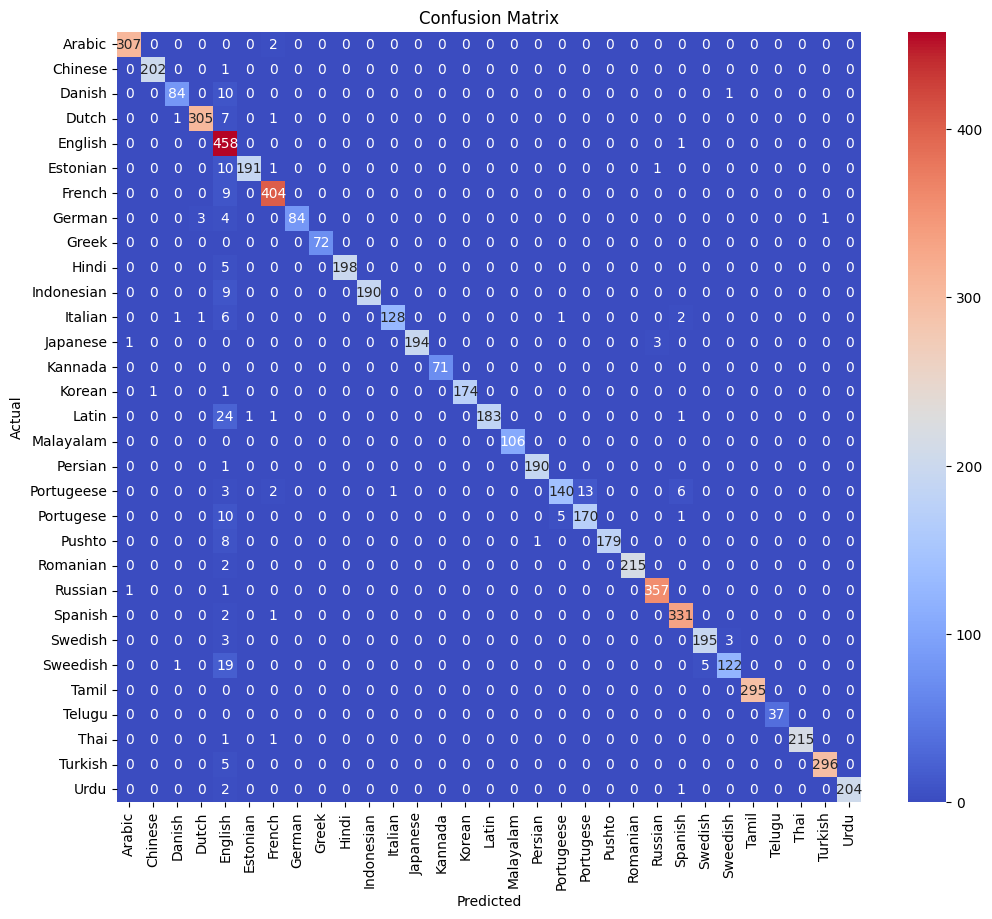

In [33]:
# Confusion Matrix
cmx = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cmx, annot=True, fmt="d", cmap='coolwarm', xticklabels=sorted(set(y)), yticklabels=sorted(set(y)))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


 TESTING 
 

In [41]:
model_pipe.predict(['నేను అను సర్వనామము']) #Telagu

array(['Telugu'], dtype=object)

In [35]:
model_pipe.predict(['The quick brown fox jumps over the lazy dog.'])  # English


array(['English'], dtype=object)

In [36]:
model_pipe.predict(['El rápido zorro marrón salta sobre el perro perezoso.'])  # Spanish


array(['Spanish'], dtype=object)

In [37]:
model_pipe.predict(['速い茶色のキツネが怠惰な犬を飛び越えます。'])  # Japanese


array(['Japanese'], dtype=object)

In [38]:
model_pipe.predict(['Быстрая коричневая лиса перепрыгивает через ленивую собаку.'])  # Russian


array(['Russian'], dtype=object)

In [39]:
model_pipe.predict(['الثعلب البني السريع يقفز فوق الكلب الكسول.'])  # Arabic


array(['Arabic'], dtype=object)

  MODEL EVALUATION

In [53]:
# Initialize the vectorizer separately for individual models
vec_individual = TfidfVectorizer(ngram_range=(1, 3), analyzer='char', max_features=5000)

In [54]:
# Fit and transform the training data
X_train_transformed = vec.fit_transform(X_train)
X_test_transformed = vec.transform(X_test)


In [55]:
# Define the models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42),
    'SVM': SVC(kernel='linear', probability=True, random_state=42),
    'Naive Bayes': MultinomialNB()
}

In [56]:
# Train and evaluate each model
results = []
for name, model in models.items():
    # Fit the model
    model.fit(X_train_transformed, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_transformed)
    
    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    # Append results
    results.append({
        'Algorithm': name,
        'Accuracy': accuracy,
        'F1 Score': f1,
        'Precision': precision,
        'Recall': recall
    })

C:\Users\abhis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [57]:
# Create a DataFrame to display results
results_df = pd.DataFrame(results)

# Display the results
results_df


,Algorithm,Accuracy,F1 Score,Precision,Recall
0,Random Forest,0.961580,0.961340,0.963424,0.961580
1,SVM,0.975104,0.975210,0.976330,0.975104
2,Naive Bayes,0.693407,0.664605,0.746559,0.693407


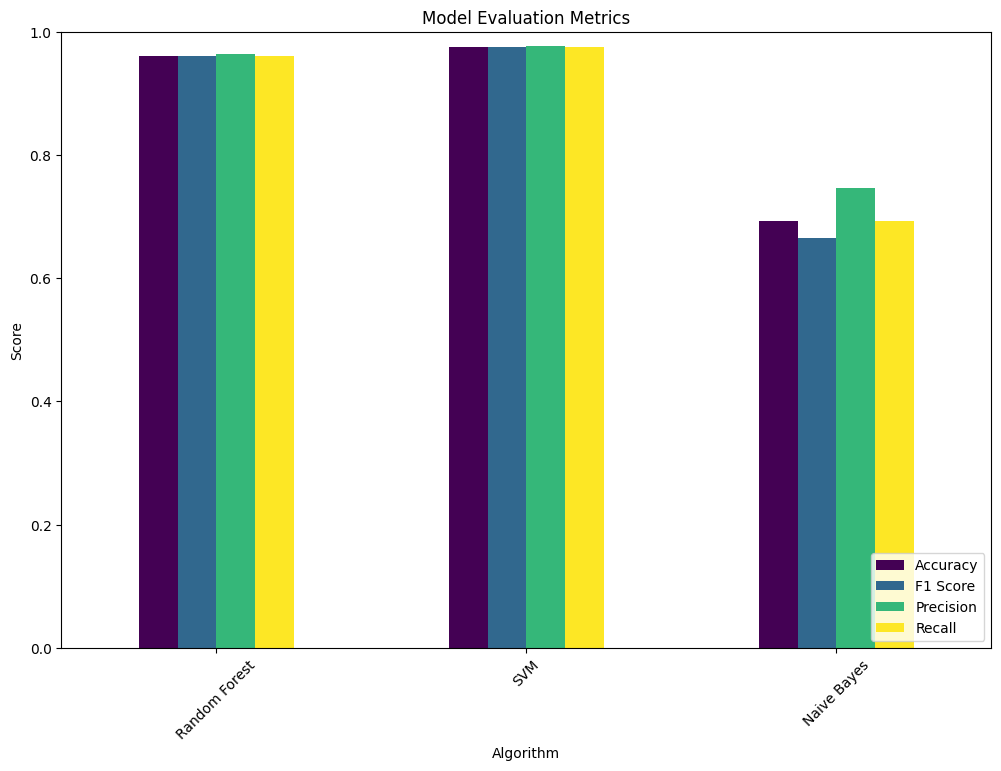

In [58]:
# Plot the evaluation metrics
results_df.set_index('Algorithm').plot(kind='bar', figsize=(12, 8), colormap='viridis')
plt.title('Model Evaluation Metrics')
plt.xlabel('Algorithm')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.show()